In [1]:
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt

from plottable import ColumnDefinition, Table
from plottable.cmap import normed_cmap
from plottable.plots import image

In [2]:
df = pd.read_html('https://fbref.com/en/comps/9/Premier-League-Stats', attrs={'id': "results2023-202491_overall"})[0]

In [3]:
df.head()

,Rk,Squad,MP,W,D,L,GF,GA,GD,Pts,Pts/MP,xG,xGA,xGD,xGD/90,Last 5,Attendance,Top Team Scorer,Goalkeeper,Notes
0,1,Arsenal,17,12,3,2,35,15,20,39,2.29,31.3,12.7,18.5,1.09,W W W L W,60159,"Eddie Nketiah, Bukayo Saka - 5",David Raya,NaN
1,2,Liverpool,17,11,5,1,36,15,21,38,2.24,34.4,20.5,13.9,0.82,D W W W D,51396,Mohamed Salah - 11,Alisson,NaN
2,3,Aston Villa,17,12,2,3,37,21,16,38,2.24,30.2,22.7,7.5,0.44,W D W W W,36211,Ollie Watkins - 9,Emiliano Martínez,NaN
3,4,Manchester City,17,10,4,3,40,20,20,34,2.00,32.2,16.5,15.6,0.92,D D L W D,46643,Erling Haaland - 14,Ederson,NaN
4,5,Tottenham,17,10,3,4,35,23,12,33,1.94,29.1,28.1,1.0,0.06,L D L W W,61581,Son Heung-min - 10,Guglielmo Vicario,NaN


In [4]:
# Read in the images
df['badge'] = df['Squad'].apply(
    lambda x: f"C:/Users/Louis/OneDrive/Documents/Python/images/{x.lower().replace('é', 'e').replace('á', 'a').replace('í', 'i')}.png"
)

In [5]:
# Some data cleaning
df[['xG', 'xGA', 'xGD']] = df[['xG', 'xGA', 'xGD']].astype(float)

df = df[[
    'Rk', 'badge', 'Squad', 'MP', 'W', 'D', 'L', 'GF', 'GA', 'GD', 'Pts', 'Pts/MP', 'xG', 'xGA', 'xGD'
]]

In [27]:
# Set up the colors
# Use Coolors to get the color hex codes: https://coolors.co/?ref=65623355a0453d000b8a2708
bg_color = "#FFFFFF" # I usually just like to do a white background
text_color = "#000000" # With black text

row_colors = {
    "top4": "#F6EEFB",
    "top6": "#FEFAD7",
    "relegation": "#EFFADB",
    "even": "#E2E2E1",
    "odd": "#B3B0B0",
}

plt.rcParams["text.color"] = text_color
plt.rcParams["font.family"] = "monospace"

In [28]:
col_defs = [
    ColumnDefinition(
        name="Rk",
        textprops={"ha": "center"},
        width=0.5,
    ),
    ColumnDefinition(
        name="badge",
        textprops={"ha": "center", "va": "center", 'color': bg_color},
        width=0.5,
        plot_fn=image,
    ),
    ColumnDefinition(
        name="Squad",
        textprops={"ha": "left", "weight": "bold"},
        width=1.75,
    ),
    ColumnDefinition(
        name="MP",
        group="Matches Played",
        textprops={"ha": "center"},
        width=0.5,
    ),
    ColumnDefinition(
        name="W",
        group="Matches Played",
        textprops={"ha": "center"},
        width=0.5,
    ),
    ColumnDefinition(
        name="D",
        group="Matches Played",
        textprops={"ha": "center"},
        width=0.5,
    ),
    ColumnDefinition(
        name="L",
        group="Matches Played",
        textprops={"ha": "center"},
        width=0.5,
    ),
    ColumnDefinition(
        name="GF",
        group="Goals",
        textprops={"ha": "center"},
        width=0.5,
    ),
    ColumnDefinition(
        name="GA",
        group="Goals",
        textprops={"ha": "center"},
        width=0.5,
    ),
    ColumnDefinition(
        name="GD",
        group="Goals",
        textprops={"ha": "center"},
        width=0.5,
    ),
    ColumnDefinition(
        name="Pts",
        group="Points",
        textprops={"ha": "center"},
        width=0.5,
    ),
    ColumnDefinition(
        name="Pts/MP",
        group="Points",
        textprops={"ha": "center"},
        width=0.5,
    ),
    ColumnDefinition(
        name="xG",
        group="Expected Goals",
        textprops={"ha": "center", "color": "#000000", "weight": "bold", "bbox": {"boxstyle": "circle", "pad": 0.35}},
        cmap=normed_cmap(df["xG"], cmap=matplotlib.cm.PiYG, num_stds=2)
    ),
    ColumnDefinition(
        name="xGA",
        group="Expected Goals",
        textprops={"ha": "center", "color": "#000000", "weight": "bold", "bbox": {"boxstyle": "circle", "pad": 0.35}},
        cmap=normed_cmap(df["xGA"], cmap=matplotlib.cm.PiYG_r, num_stds=2)
    ),
    ColumnDefinition(
        name="xGD",
        group="Expected Goals",
        textprops={"ha": "center", "color": "#000000", "weight": "bold", "bbox": {"boxstyle": "circle", "pad": 0.35}},
        cmap=normed_cmap(df["xGD"], cmap=matplotlib.cm.PiYG, num_stds=2)
    ),
]

C:\Users\Louis\AppData\Local\Temp\ipykernel_15092\536328198.py:34: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


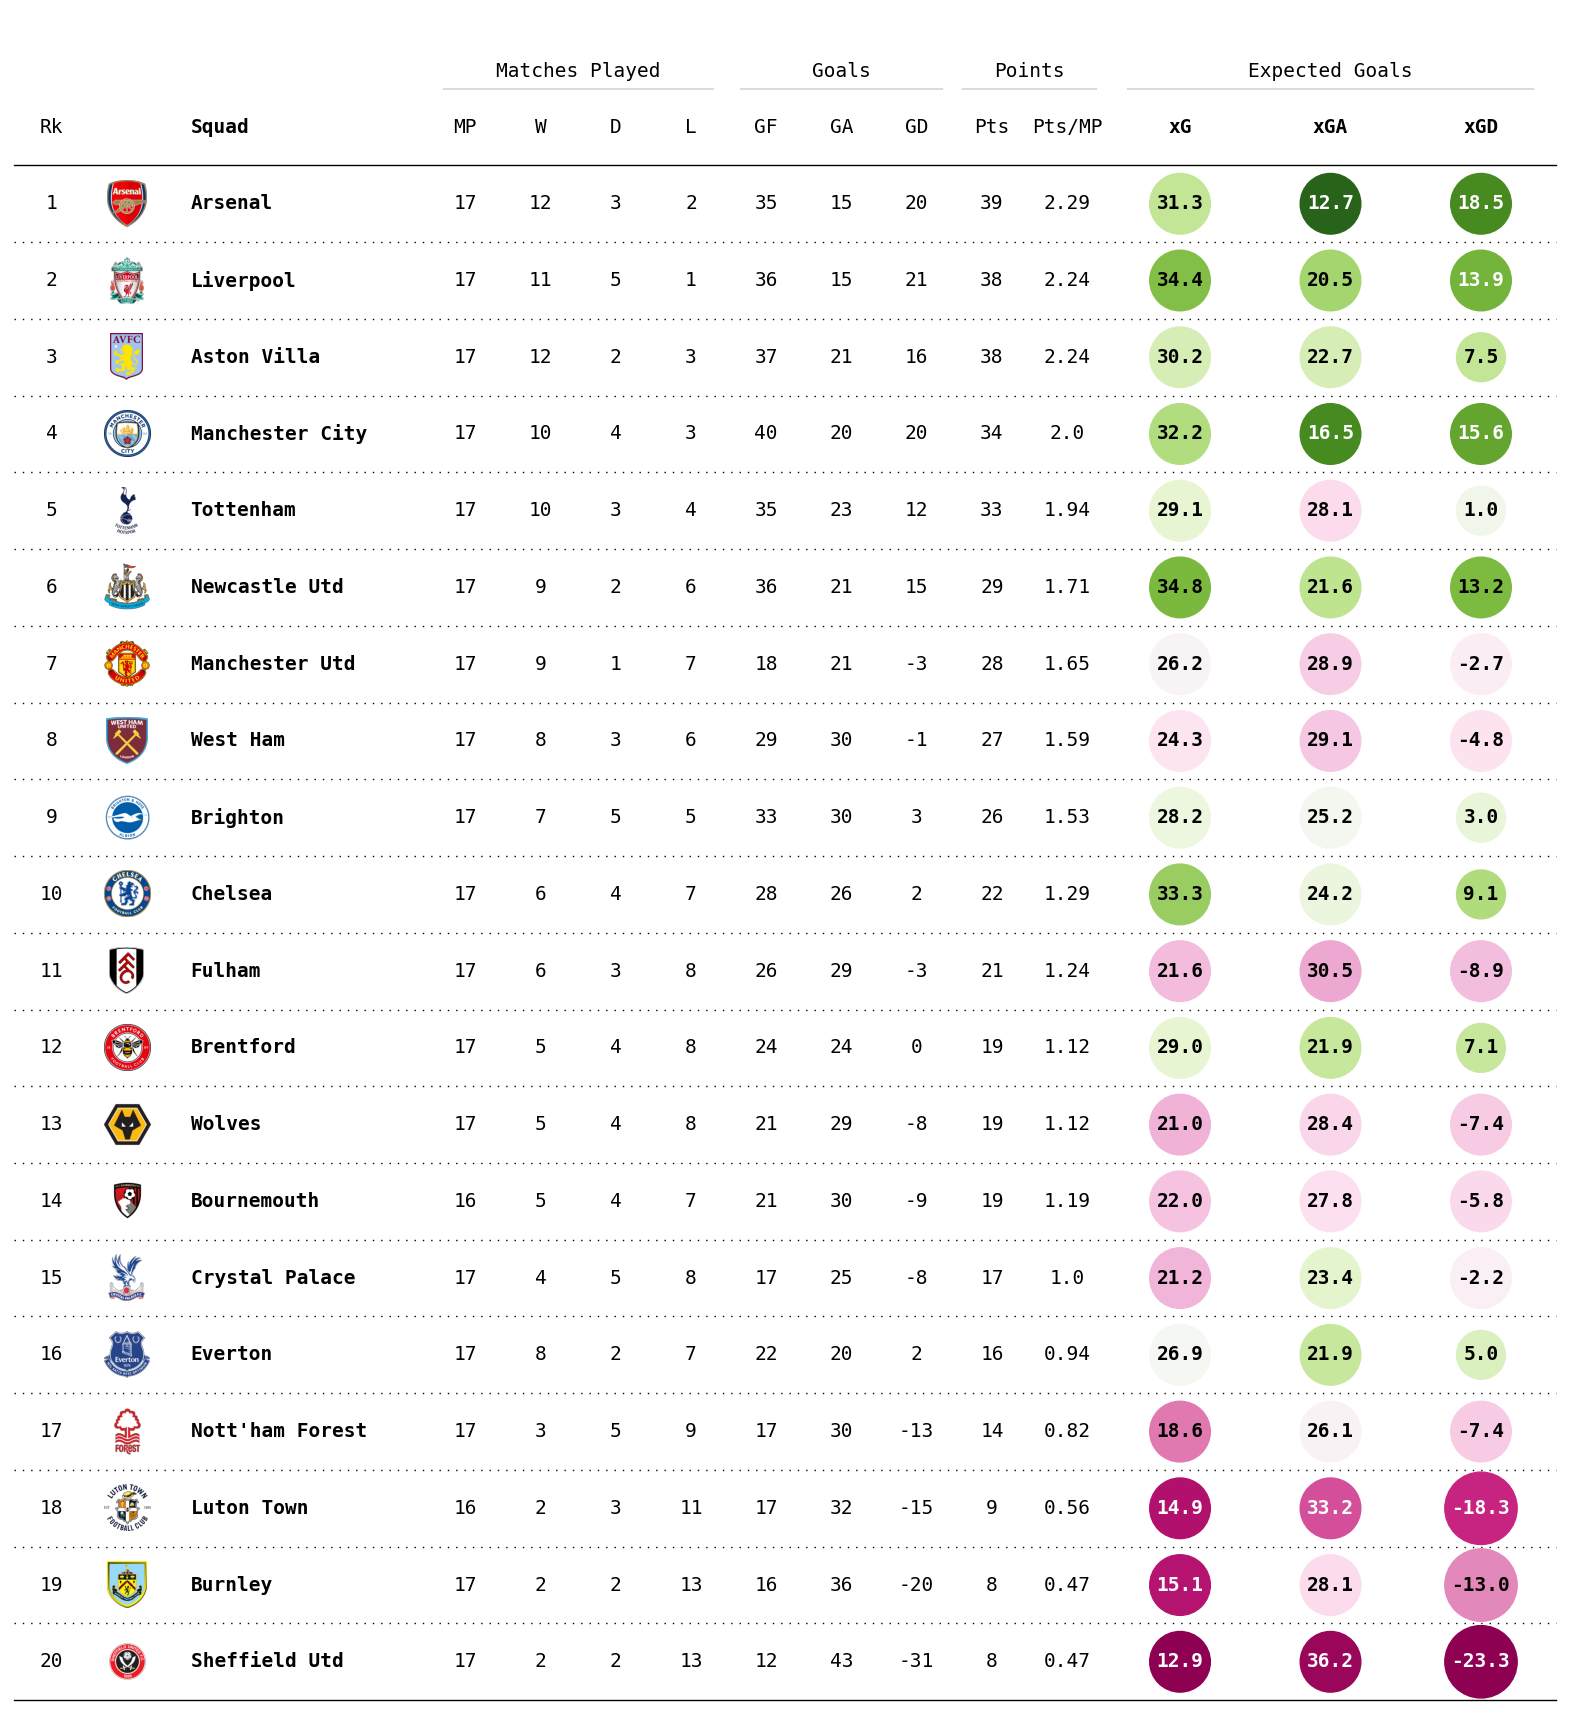

In [30]:
fig, ax = plt.subplots(figsize=(20, 22))
fig.set_facecolor(bg_color)
ax.set_facecolor(bg_color)
table = Table(
    df,
    column_definitions=col_defs,
    index_col="Rk",
    row_dividers=True,
    row_divider_kw={"linewidth": 1, "linestyle": (0, (1, 5))},
    footer_divider=True,
    textprops={"fontsize": 14},
    col_label_divider_kw={"linewidth": 1, "linestyle": "-"},
    column_border_kw={"linewidth": .5, "linestyle": "-"},
    ax=ax,
).autoset_fontcolors(colnames=["xG", "xGA", "xGD"]) # This will set the font color of the columns based on the cmap so the text is readable

table.cells[10, 3].textprops["color"] = "#8ACB88"
# Here we can add colors to the rows
# I personally don't like the look of this, but it's an option

#for idx in [0, 1, 2, 3]:
# table.rows[idx].set_facecolor(row_colors["top4"])

#for idx in [4, 5]:
# table.rows[idx].set_facecolor(row_colors["top6"])
#
#
#for idx in [17, 18, 19]:
# table.rows[idx].set_facecolor(row_colors["relegation"])


fig.show()

In [31]:
fig.savefig(
    "C:/Users/Louis/OneDrive/Documents/Python/prem_table.png",
    facecolor=ax.get_facecolor(),
    dpi=200,
    bbox_inches="tight",
)